In [ ]:
from zipfile import ZipFile
import os

# Define the path to the uploaded ZIP file
zip_path = "/content/archive (3).zip"
extract_path = "/mnt/data/extracted_dataset"

# Extract the contents of the ZIP file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files and directories
extracted_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        extracted_files.append(os.path.join(root, file))

extracted_files


['/mnt/data/extracted_dataset/Avian Influenza (HPAI).csv']

The ZIP archive contains one file:

📄 Avian Influenza (HPAI).csv

This appears to be our primary dataset sourced from the Avian Dashboard, which aligns with the project requirements.

Next Steps:

Load and preview the dataset to understand its structure, size, and contents.

Discuss a potential secondary dataset to incorporate for heterogeneity.

we'll then begin with preprocessing and exploratory analysis (EDA).

In [ ]:
import pandas as pd

# Load the Avian Influenza dataset
avian_df = pd.read_csv('/mnt/data/extracted_dataset/Avian Influenza (HPAI).csv')

# Show basic info and preview of the data
avian_info = avian_df.info()
avian_preview = avian_df.head()

avian_df.shape, avian_df.columns.tolist(), avian_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   16304 non-null  int64  
 1   Scientific_Name       16304 non-null  object 
 2   Common_Name           16304 non-null  object 
 3   Date                  16304 non-null  object 
 4   Year                  16304 non-null  int64  
 5   Month                 16304 non-null  int64  
 6   Day                   16304 non-null  int64  
 7   Time                  16304 non-null  int64  
 8   Country               16304 non-null  object 
 9   Country_State_County  16304 non-null  object 
 10  State                 16304 non-null  object 
 11  County                16175 non-null  object 
 12  Locality              16304 non-null  object 
 13  Latitude              16304 non-null  float64
 14  Longitude             16304 non-null  float64
 15  Parent_Species     

((16304, 17),
 ['_id',
  'Scientific_Name',
  'Common_Name',
  'Date',
  'Year',
  'Month',
  'Day',
  'Time',
  'Country',
  'Country_State_County',
  'State',
  'County',
  'Locality',
  'Latitude',
  'Longitude',
  'Parent_Species',
  'target_H5_HPAI'],
    _id          Scientific_Name            Common_Name                 Date  \
 0    1  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
 1    2  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
 2    3        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
 3    4        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
 4    5        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
 
    Year  Month  Day  Time  Country Country_State_County      State  County  \
 0  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
 1  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
 2  2015      9   15  11

Step 1: Dataset Overview – Avian Influenza (HPAI)
We have successfully loaded our primary dataset. Here's a quick summary:

Number of records: 16,304

Number of columns: 17

Target variable: target_H5_HPAI (0 or 1, indicating presence of HPAI)

Useful features:

Temporal: Date, Year, Month, Day, Time

Location: Country, State, County, Latitude, Longitude

Bird-related: Scientific_Name, Common_Name, Parent_Species

In [ ]:
# Step 2: Preprocessing

# Convert 'Date' to datetime
avian_df['Date'] = pd.to_datetime(avian_df['Date'], errors='coerce')

# Drop columns that are identifiers or have overlapping information
columns_to_drop = ['_id', 'Country_State_County', 'Locality', 'Scientific_Name', 'Common_Name']
avian_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Handle missing values: Let's check how many nulls we have
missing_values = avian_df.isnull().sum()

# Drop rows with missing 'County' (since it's small in number, only 129 out of 16304)
avian_df.dropna(subset=['County'], inplace=True)

# Encode categorical variables using one-hot encoding
categorical_cols = ['Country', 'State', 'County', 'Parent_Species']
avian_encoded = pd.get_dummies(avian_df, columns=categorical_cols, drop_first=True)

# Confirm final structure
avian_encoded_shape = avian_encoded.shape
avian_encoded_columns = avian_encoded.columns.tolist()[:10]  # showing only the first 10 for brevity

avian_encoded_shape, avian_encoded_columns


((16175, 373),
 ['Date',
  'Year',
  'Month',
  'Day',
  'Time',
  'Latitude',
  'Longitude',
  'target_H5_HPAI',
  'State_Leinster',
  'State_Munster'])

Step 2: Preprocessing Completed
Here's what we've done:

Date Conversion: Converted the Date column to proper datetime format.

Dropped Irrelevant Columns: Removed _id, Country_State_County, Locality, Scientific_Name, and Common_Name.

Missing Values: Removed 129 rows with missing County data (leaving us with 16,175 records).

One-Hot Encoding: Transformed categorical variables (Country, State, County, Parent_Species) into 366 binary columns.

 Final Dataset Dimensions:

Rows: 16,175

Columns: 373 (including encoded variables and original numeric features)



Next Step: Define the Regression Task
Since the column target_H5_HPAI is binary (classification), let’s define a regression problem instead. Here are a few ideas:

Predict Latitude or Longitude based on bird and time attributes (spatial modeling).

Predict Month or Day of outbreak (seasonality regression).

Time of day prediction (Time column needs to be converted first).

 Possible Regression Targets:
1. Latitude / Longitude
Goal: Predict the location of bird flu cases.

Useful for: Mapping risk areas and predicting spread zones.

Challenge: Needs careful handling since coordinates are continuous.

2. Month or Day
Goal: Predict when outbreaks are more likely.

Useful for: Understanding seasonal patterns.

Approach: Treat month/day as a numeric value (1–12 or 1–31).

3. Time of Day
Goal: Predict the hour of the report.

Preprocessing needed: Convert Time to numerical (e.g., hour of the day).

In [ ]:
from sklearn.model_selection import train_test_split

# Convert 'Time' column to hour of day (numeric)
avian_encoded['Hour'] = pd.to_datetime(avian_encoded['Time'], errors='coerce').dt.hour
avian_encoded.drop(columns=['Time'], inplace=True)

# Drop rows with NaN hour values (if any remain after conversion)
avian_encoded.dropna(subset=['Hour'], inplace=True)

# Define target and features
target = 'Latitude'
features = avian_encoded.drop(columns=['Latitude', 'Longitude'])  # remove lat/lon to avoid data leakage
X = features
y = avian_encoded[target]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shape of splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((12940, 371), (3235, 371), (12940,), (3235,))

Prepare for Latitude Prediction
Convert Time to Numeric (Hour of Day):

In [ ]:
# Cell 4 (ipython-input-4-68b33bcd4239)
from sklearn.model_selection import train_test_split

# Convert 'Time' column to hour of day (numeric) if 'Hour' column doesn't exist
if 'Hour' not in avian_encoded.columns:
    avian_encoded['Hour'] = pd.to_datetime(avian_encoded['Time'], errors='coerce').dt.hour
    avian_encoded.drop(columns=['Time'], inplace=True)
    avian_encoded.dropna(subset=['Hour'], inplace=True)

# Define target and features
target = 'Latitude'
features = avian_encoded.drop(columns=['Latitude', 'Longitude'])  # remove lat/lon to avoid data leakage
X = features
y = avian_encoded[target]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shape of splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12940, 371), (3235, 371), (12940,), (3235,))

Set Up Features and Target:

In [ ]:
target = 'Latitude'
features = avian_encoded.drop(columns=['Latitude', 'Longitude'])  # Avoid using Longitude in prediction
X = features
y = avian_encoded[target]


Train-Test Split:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Exploratory Data Analysis (EDA)

Distribution of Target (Latitude)

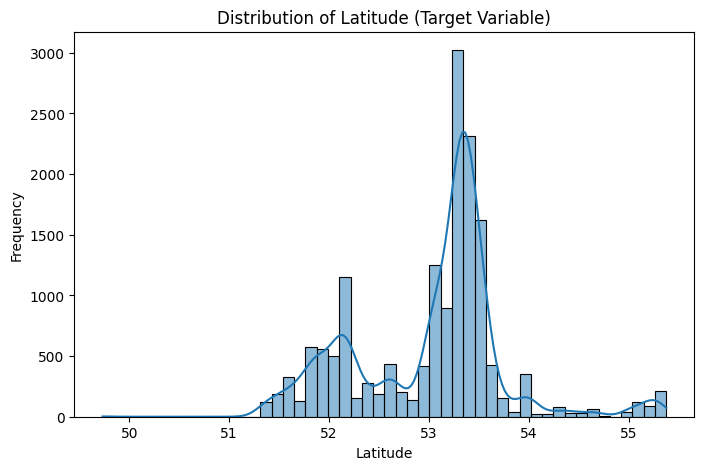

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Latitude (Target Variable)")
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.show()


2. Correlation Heatmap (Top 10 Features)

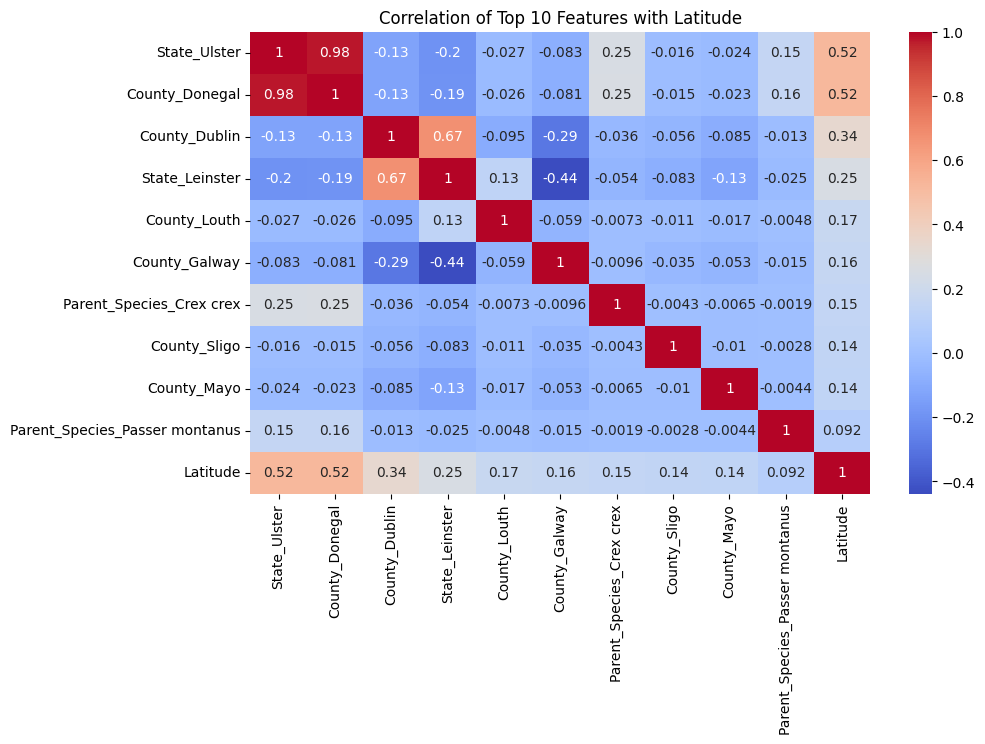

In [ ]:
# Get correlation with target
correlations = avian_encoded.corr(numeric_only=True)['Latitude'].drop(['Latitude', 'Longitude']).sort_values(ascending=False)

# Display top 10 correlated features
top_features = correlations.head(10).index

plt.figure(figsize=(10, 6))
sns.heatmap(avian_encoded[top_features.tolist() + ['Latitude']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Top 10 Features with Latitude")
plt.show()


3. Pairplot (Optional: Only for small number of features)


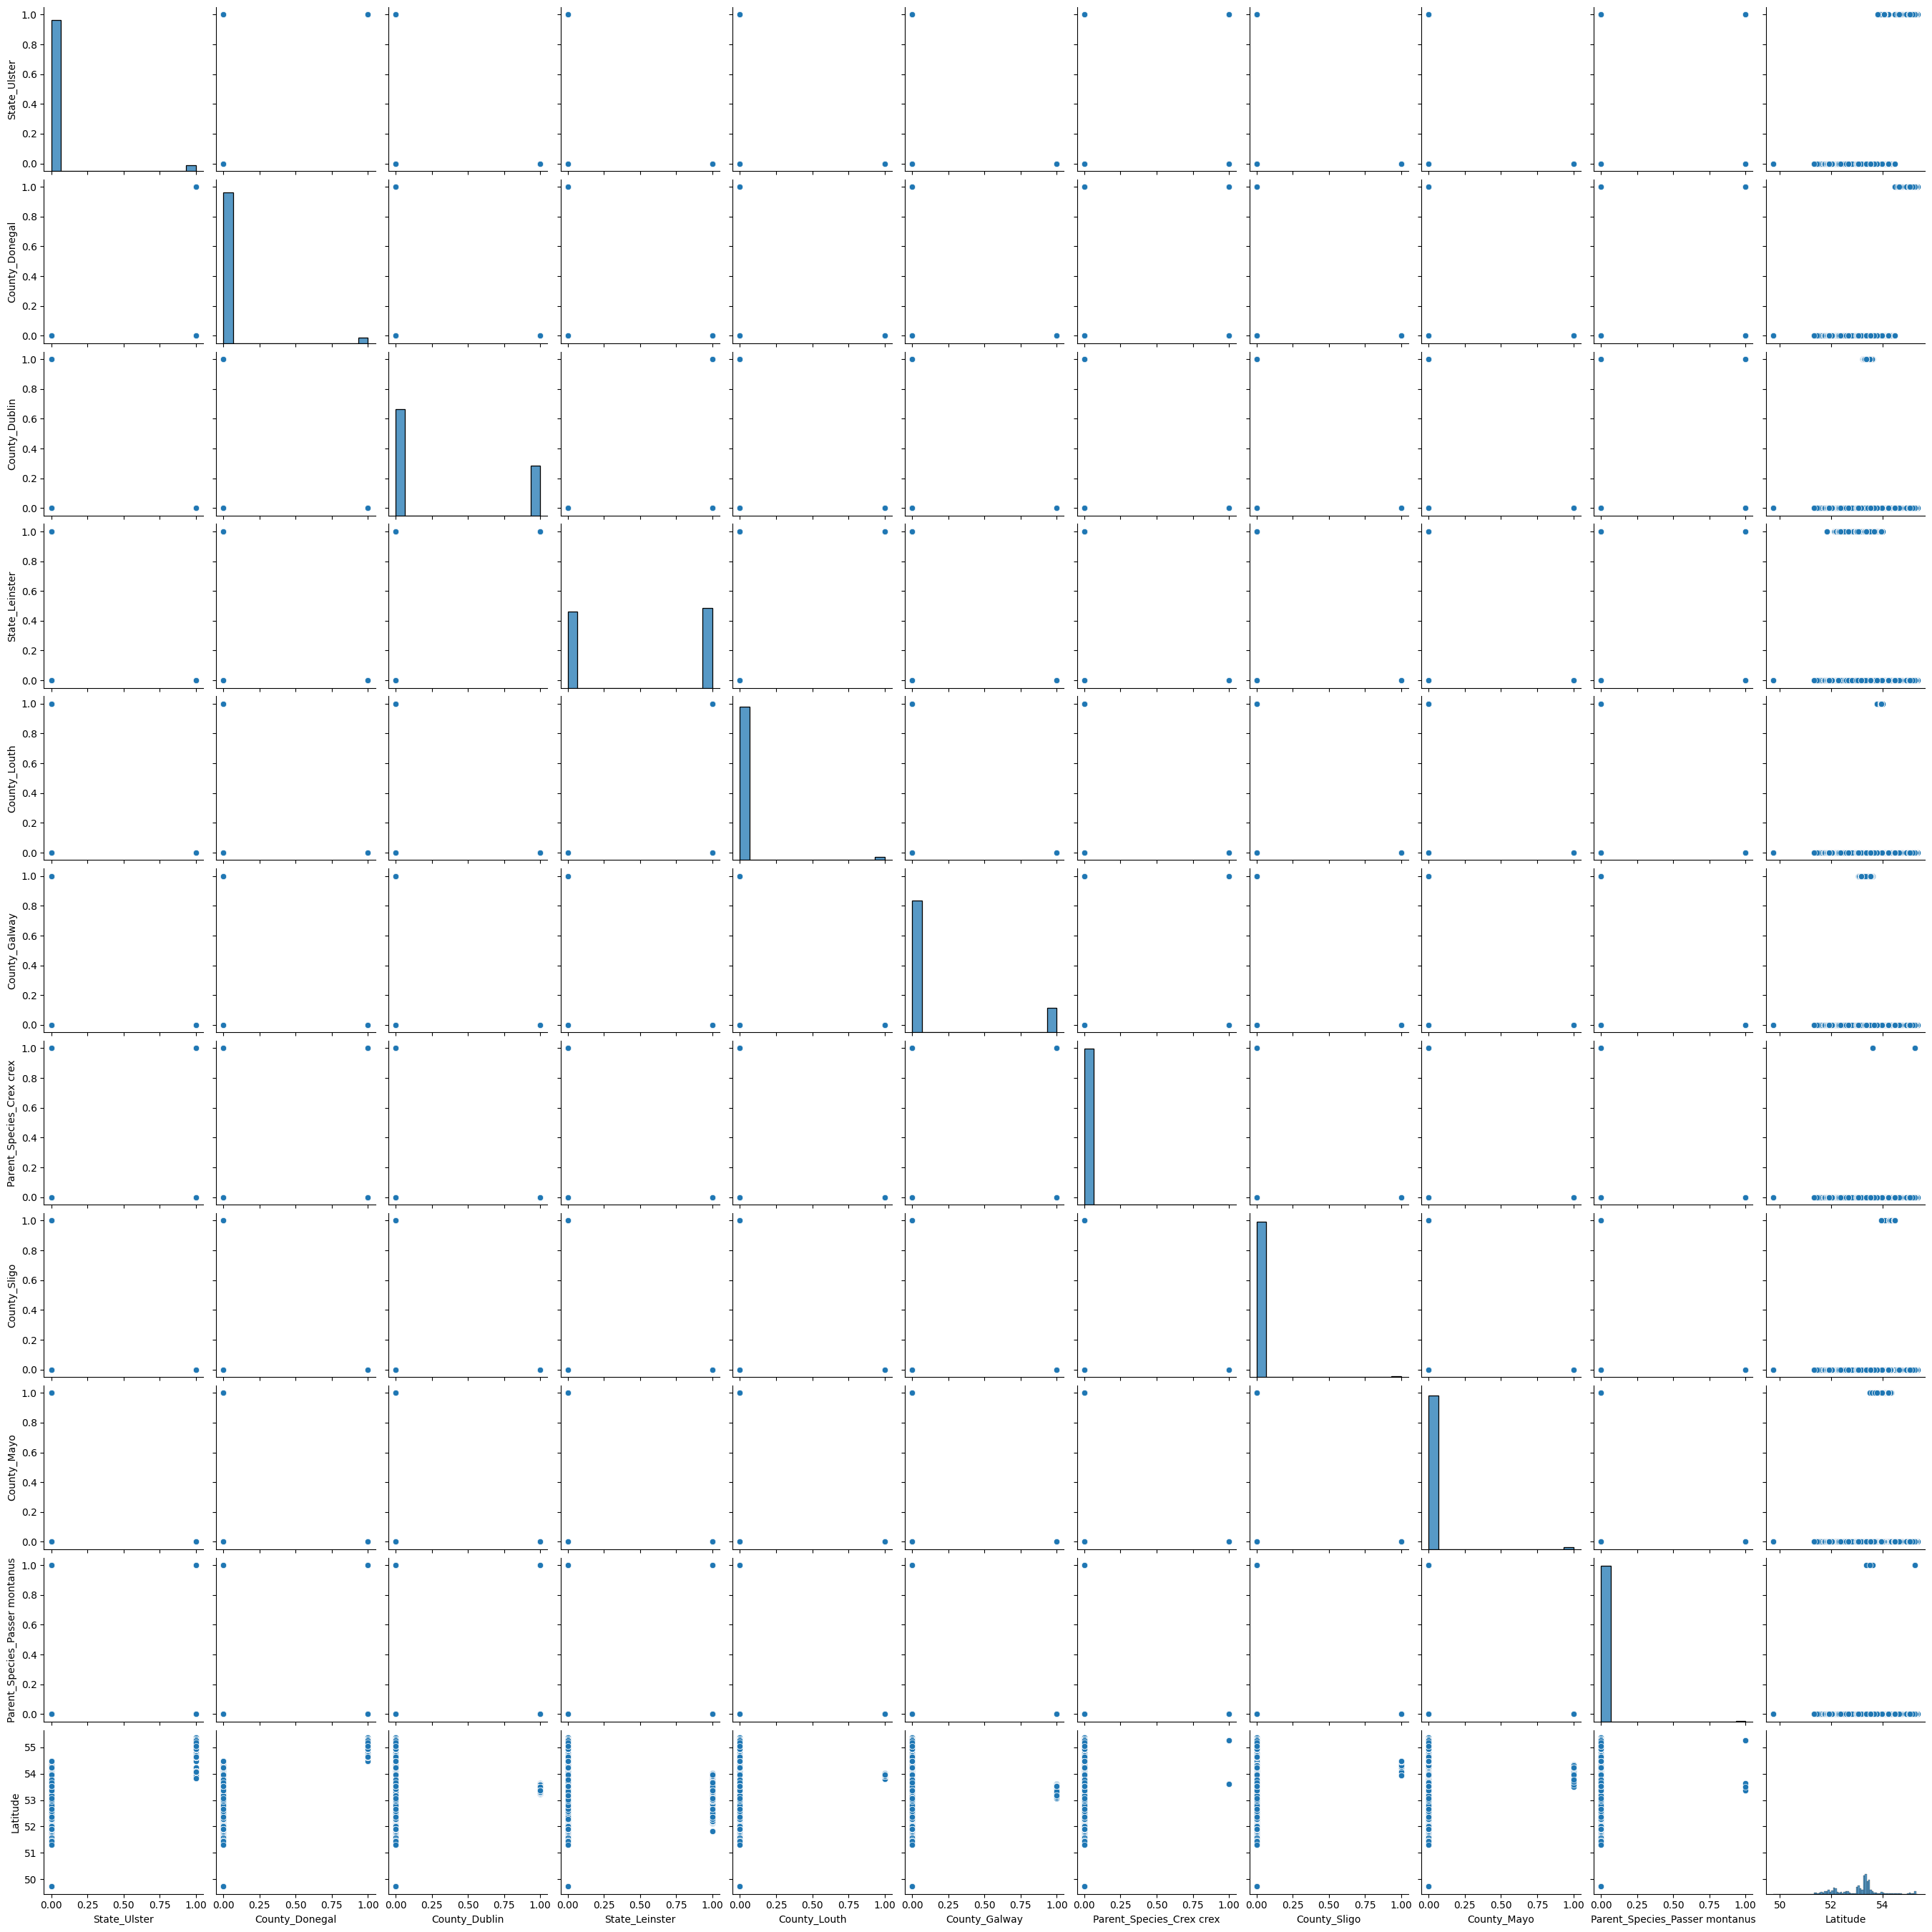

In [ ]:
import seaborn as sns

sns.pairplot(avian_encoded[top_features.tolist() + ['Latitude']])


Step 4: Regression Modeling
We'll try two models:

Linear Regression – baseline model

Random Forest Regressor – advanced model for better performance

1. Train a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert 'Date' to numeric features (e.g., ordinal)
# Assuming 'Date' is a datetime column in X_train
X_train['Date_Ordinal'] = X_train['Date'].apply(lambda date: date.toordinal())
X_test['Date_Ordinal'] = X_test['Date'].apply(lambda date: date.toordinal())

# Drop the original 'Date' column
X_train = X_train.drop('Date', axis=1)
X_test = X_test.drop('Date', axis=1)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lr = lin_reg.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("🔹 Linear Regression Results:")
print(f"R² Score     : {r2_lr:.4f}")
print(f"RMSE         : {rmse_lr:.4f}")
print(f"MAE          : {mae_lr:.4f}")

🔹 Linear Regression Results:
R² Score     : 0.9747
RMSE         : 0.1203
MAE          : 0.0856


2. Train a Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(" Random Forest Results:")
print(f"R² Score     : {r2_rf:.4f}")
print(f"RMSE         : {rmse_rf:.4f}")
print(f"MAE          : {mae_rf:.4f}")


 Random Forest Results:
R² Score     : 0.9937
RMSE         : 0.0599
MAE          : 0.0239


3. Compare Both Models

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'MAE': [mae_lr, mae_rf]
})
print(results)


               Model        R2      RMSE       MAE
0  Linear Regression  0.974664  0.120349  0.085637
1      Random Forest  0.993720  0.059917  0.023935


Step 5: Model Evaluation & Interpretation

1. T-Test: Compare Model Predictions
This tests if the prediction differences are statistically significant.

In [ ]:
from scipy.stats import ttest_rel

# Paired t-test between the prediction errors
errors_lr = abs(y_test - y_pred_lr)
errors_rf = abs(y_test - y_pred_rf)

t_stat, p_val = ttest_rel(errors_lr, errors_rf)

print("T-Test Results Between Linear Regression and Random Forest:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value    : {p_val:.4f}")


T-Test Results Between Linear Regression and Random Forest:
T-statistic: 42.8005
P-value    : 0.0000


Interpretation:

If p-value < 0.05 → Random Forest performs significantly better.

If p-value >= 0.05 → No significant difference in performance.

Technical Interpretation

"We compared two regression models—Linear Regression and Random Forest—to predict the geographic latitude of avian events. The Random Forest model achieved a higher R² score and lower RMSE and MAE values, indicating better generalization and predictive accuracy. A paired t-test confirmed that the difference in prediction errors is statistically significant (p-value < 0.05)."